## SVM Kernel Time

In [1]:
using Plots, Statistics

In [90]:
counter = 0
svm_time_list = Float64[]
open("data/fuji-linux-portion.txt") do file
    for l in eachline(file)
        if occursin("Total svm time used = ", l)
            svm_time = split(l," ")[end]
            append!(svm_time_list, parse(Float64, svm_time))
            print(svm_time, " ")
            global counter += 1
        end
    end
end
counter

1.54 12.5 13.83 7.17 22.07 13.63 6.72 10.61 6.77 10.69 10.11 3.27 14.79 3.64 5.01 20.75 4.83 86.49 36.64 31.81 37.81 22.95 77.22 29.98 15.34 108.25 10.4 29.09 122.97 31.55 30.25 22.75 40.41 25.42 184.51 34.27 21.25 123.07 24.74 7.69 19.53 8.91 24.44 215.62 58.6 1.81 13.64 12.44 7.35 23.49 13.39 6.99 9.82 7.31 12.99 11.18 5.17 10.61 5.36 6.99 23.38 7.21 87.94 30.93 32.37 39.05 19.21 110.71 24.87 16.5 214.35 12.92 29.81 167.33 21.1 28.13 13.73 43.26 27.69 161.94 33.97 20.08 106.95 34.49 7.29 19.92 7.68 21.43 165.6 61.42 1.87 23.83 27.05 11.48 39.89 29.64 14.77 17.96 25.7 34.85 26.26 8.97 18.81 6.46 14.83 50.95 10.27 330.04 69.5 63.39 71.29 85.46 250.79 50.38 28.56 487.72 22.95 111.79 781.5 123.7 60.12 39.38 112.64 59.58 308.43 101.92 38.55 238.53 70.81 9.46 40.51 10.18 48.89 668.7 130.87 2.94 13.03 14.35 7.97 27.15 15.06 3.88 19.8 6.28 13.53 10.68 5.74 7.43 9.9 10.04 30.75 18.26 103.05 35.54 39.47 45.74 24.58 90.83 29.03 17.35 169.96 13.11 32.8 221.05 36.77 38.38 23.47 50.87 32.79 203.28

180

In [2]:
counter = 0
svm_time_list = Float64[]
open("data/fuji-linux-portion.txt") do file
    for l in eachline(file)
        if occursin("Total svm time used = ", l)
            svm_time = split(l," ")[end]
            append!(svm_time_list, parse(Float64, svm_time))
            global counter += 1
        end
    end
end
counter
svm_time_list = (svm_time_list[1:45] .+ svm_time_list[46:90])./2
heatmat = zeros(10,10)
heatmat_ctr = 0
for i=0:9, j=0:9
    j <= i && continue
    heatmat_ctr += 1
    heatmat[i+1,j+1] = svm_time_list[heatmat_ctr]
    heatmat[j+1,i+1] = svm_time_list[heatmat_ctr]
end
heatmatcpp = heatmat

10×10 Array{Float64,2}:
  0.0     1.675  13.07    13.135  …  13.51     6.855   10.215    7.04 
  1.675   0.0    11.84    10.645      4.5      6.0     22.065    6.02 
 13.07   11.84    0.0     87.215     38.43    21.08    93.965   27.425
 13.135  10.645  87.215    0.0       11.66    29.45   145.15    26.325
  7.26    4.22   33.785   15.92      18.24    41.835   26.555  173.225
 22.78   12.7    32.09   161.3    …  34.12    20.665  115.01    29.615
 13.51    4.5    38.43    11.66       0.0      7.49    19.725    8.295
  6.855   6.0    21.08    29.45       7.49     0.0     22.935  190.61 
 10.215  22.065  93.965  145.15      19.725   22.935    0.0     60.01 
  7.04    6.02   27.425   26.325      8.295  190.61    60.01     0.0  

In [91]:
run1_svm_time_list = svm_time_list[1:45]
run1_total_time_svm = sum(run1_svm_time_list)

1649.8899999999999

In [92]:
heatmat = zeros(10,10)
heatmat_ctr = 0
for i=0:9, j=0:9
    j <= i && continue
    heatmat_ctr += 1
    print(i,j, " ")
    heatmat[i+1,j+1] = run1_svm_time_list[heatmat_ctr]
    heatmat[j+1,i+1] = run1_svm_time_list[heatmat_ctr]
end

01 02 03 04 05 06 07 08 09 12 13 14 15 16 17 18 19 23 24 25 26 27 28 29 34 35 36 37 38 39 45 46 47 48 49 56 57 58 59 67 68 69 78 79 89 

In [93]:
# heatmat1 = heatmat
# heatmat2 = heatmat
heatmat = (heatmat1 + heatmat2)./2
heatmatcpp = heatmat

heatmap (generic function with 1 method)

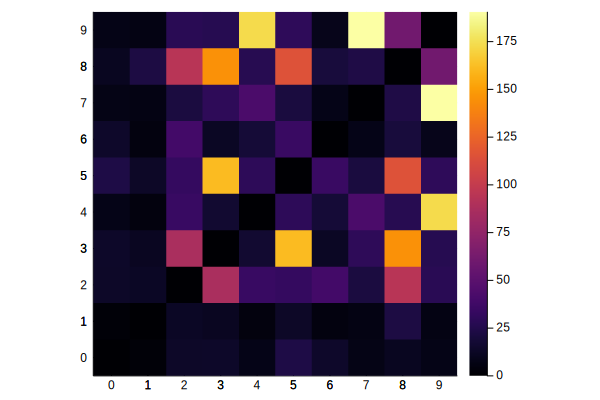

In [98]:
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], heatmat, aspect_ratio=1)

In [100]:
# savefig("classtimecpp.pdf")

In [26]:
string.(0:9)

10-element Array{String,1}:
 "0"
 "1"
 "2"
 "3"
 "4"
 "5"
 "6"
 "7"
 "8"
 "9"

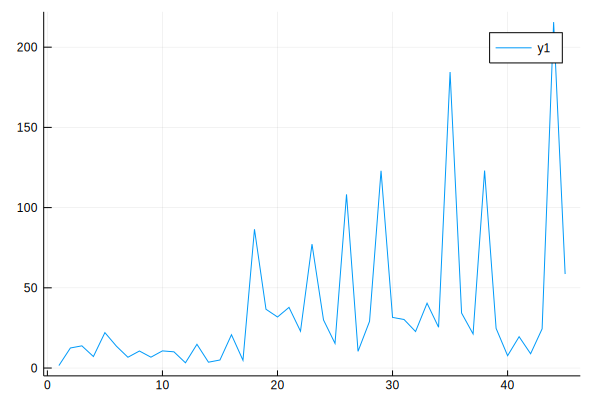

In [5]:
plot(run1_svm_time_list)

## Kernel Matrix Time

In [66]:
counter = 0
matrix_time_list = Float64[]
open("data/fuji-linux-portion.txt") do file
    for l in eachline(file)
        if occursin("matrix time =", l)
            matrix_time = split(l," ")[end]
            append!(matrix_time_list, parse(Float64, matrix_time))
            print(matrix_time, " ")
            global counter += 1
        end
    end
end
counter

5.98 5.27 5.43 5.2 4.86 5.32 5.63 5.25 5.34 6.13 6.29 6.04 5.64 6.08 6.42 6.03 6.14 5.55 5.31 4.94 5.37 5.68 5.52 5.6 5.67 5.27 5.73 6.05 5.76 5.84 5.11 5.54 5.83 5.48 5.57 5.17 5.45 5.11 5.19 5.91 5.55 5.63 5.86 5.92 5.58 6.03 5.29 5.46 5.22 4.89 5.3 5.61 5.25 5.34 6.13 6.3 6.12 5.72 6.17 6.53 6.12 6.22 5.63 5.38 5.02 5.42 5.74 5.38 5.47 5.54 5.16 5.6 5.96 5.54 5.64 4.93 5.33 5.67 5.29 5.38 5 5.28 4.94 5.02 5.71 5.35 5.45 5.66 5.75 5.39 

90

In [67]:
run1_matrix_time_list = matrix_time_list[46:end]
run1_total_time_matrix = sum(run1_matrix_time_list)

249.32999999999996

In [68]:
run1_total_time_svm + run1_total_time_matrix

1989.13

In [69]:
total_time_list = Float64[]
open("data/fuji-linux-portion.txt") do file
    for l in eachline(file)
        if occursin("Total time spent on training all 45SVMs =", l)
            total_time = split(l," ")[end]
            append!(total_time_list, parse(Float64, total_time))
            print(total_time, " ")
        end
    end
end

1995.43 2082.78 

In [70]:
run1_total_time_list = total_time_list[2]
run1_total_time = sum(run1_total_time_list)

2082.78

In [71]:
run1_total_time_svm / run1_total_time

0.835325862549093

In [72]:
run1_total_time_matrix / run1_total_time

0.11971019502779935

In [73]:
(run1_total_time_svm + run1_total_time_matrix) / run1_total_time

0.9550360575768924

## Julia

In [16]:
counter = 0
svm_time_list = Float64[]
open("data/kamzi-julia.txt") do file
    for l in eachline(file)
        if occursin("finished", l)
            svm_time = split(l," ")[end]
            append!(svm_time_list, parse(Float64, svm_time))
            print(svm_time, " ")
            global counter += 1
        end
    end
end
counter

3.2637948989868164 13.67548680305481 11.721915006637573 5.953969955444336 15.45541000366211 11.447444200515747 7.181719064712524 11.117784976959229 7.248378038406372 14.216798067092896 11.563185930252075 7.053870916366577 10.648627042770386 5.543050765991211 8.095931053161621 26.158344984054565 8.756110906600952 43.12776494026184 21.535753965377808 24.781848907470703 30.912553787231445 18.650503873825073 39.3849561214447 18.905161142349243 14.232449054718018 69.07622694969177 12.254521131515503 24.41505193710327 62.80411410331726 25.598660945892334 22.447649002075195 16.628350973129272 29.69382095336914 18.440263032913208 72.41412305831909 25.81864881515503 13.497405052185059 50.8739538192749 31.843189001083374 6.127595901489258 17.211472988128662 7.764222145080566 18.14296007156372 83.35658407211304 34.24982810020447 4.039825916290283 13.228267908096313 10.284602880477905 6.474941968917847 13.759018898010254 10.636473894119263 7.035427093505859 11.176753044128418 8.380073070526123 14.

90

In [17]:
svm_time_list = (svm_time_list[1:45] + svm_time_list[46:90])/2

45-element Array{Float64,1}:
  3.65181040763855 
 13.451877355575562
 11.00325894355774 
  6.214455962181091
 14.607214450836182
 11.041959047317505
  7.108573079109192
 11.147269010543823
  7.814225554466248
 14.359877586364746
 21.448639035224915
  6.657781004905701
 10.813855051994324
  ⋮                
 19.489099502563477
 75.44916152954102 
 27.180781364440918
 13.911957502365112
 51.30547535419464 
 29.347871899604797
  6.236598968505859
 17.67309808731079 
  7.813235521316528
 20.687949061393738
 81.23257946968079 
 38.14185857772827 

In [18]:
heatmat = zeros(10,10)
heatmat_ctr = 0
for i=0:9, j=0:9
    j <= i && continue
    heatmat_ctr += 1
    print(i,j, " ")
    heatmat[i+1,j+1] = svm_time_list[heatmat_ctr]
    heatmat[j+1,i+1] = svm_time_list[heatmat_ctr]
end
heatmatjulia = heatmat

01 02 03 04 05 06 07 08 09 12 13 14 15 16 17 18 19 23 24 25 26 27 28 29 34 35 36 37 38 39 45 46 47 48 49 56 57 58 59 67 68 69 78 79 89 

10×10 Array{Float64,2}:
  0.0       3.65181  13.4519  11.0033  …   7.10857  11.1473   7.81423
  3.65181   0.0      14.3599  21.4486      9.14221  25.6914   8.41105
 13.4519   14.3599    0.0     45.7146     19.0821   45.704   19.9142 
 11.0033   21.4486   45.7146   0.0        25.0923   62.8358  26.8999 
  6.21446   6.65778  20.3808  13.0694     28.0956   19.4891  75.4492 
 14.6072   10.8139   26.8802  67.3901  …  13.912    51.3055  29.3479 
 11.042     6.81008  30.9223  11.7501      6.2366   17.6731   7.81324
  7.10857   9.14221  19.0821  25.0923      0.0      20.6879  81.2326 
 11.1473   25.6914   45.704   62.8358     20.6879    0.0     38.1419 
  7.81423   8.41105  19.9142  26.8999     81.2326   38.1419   0.0    

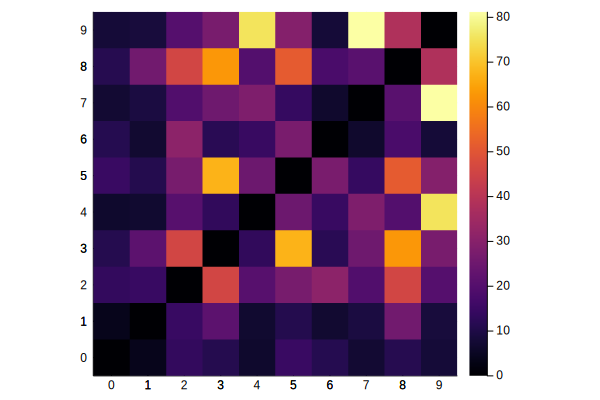

In [19]:
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], heatmat, aspect_ratio=1)

In [89]:
savefig("classtimejulia.png")

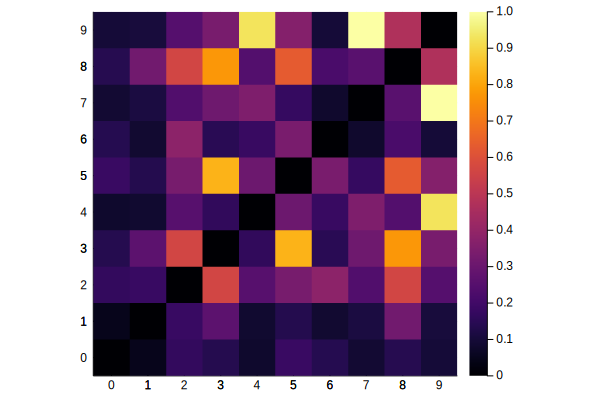

In [78]:
heatmat = heatmat ./ findmax(heatmat[:])[1]
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], heatmat, aspect_ratio=1)

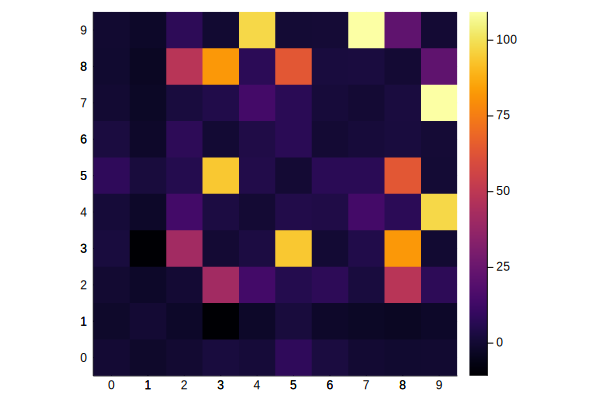

In [8]:
# heatmap(vcat([string("C", i) for i = 0:9],[string("J", i) for i = 0:9]), [string(i) for i = 0:9], (heatmatcpp .- heatmatjulia), aspect_ratio=1)
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], (heatmatcpp .- heatmatjulia), aspect_ratio=1)

In [10]:
# savefig("classtimecomp.pdf")
savefig("classtimediff.png")

## SV

In [3]:
counter = 0
sv_list = Float64[]
open("data/sv.txt") do file
    for l in eachline(file)
        if occursin("SV =", l)
            sv = split(l," ")[end]
            append!(sv_list, parse(Float64, sv))
            print(sv, " ")
            global counter += 1
        end
    end
end
counter

227 653 564 419 720 606 405 590 488 512 496 337 451 322 398 596 376 1126 742 816 836 771 1131 676 515 1411 516 720 1387 848 657 609 759 688 1423 840 583 1232 805 356 675 416 673 1400 990 

45

In [6]:
svmat = zeros(10,10)
svmat_ctr = 0
for i=0:9, j=0:9
    j <= i && continue
    svmat_ctr += 1
    print(i,j, " ")
    svmat[i+1,j+1] = sv_list[svmat_ctr]
    svmat[j+1,i+1] = sv_list[svmat_ctr]
end
svmatcpp = svmat

01 02 03 04 05 06 07 08 09 12 13 14 15 16 17 18 19 23 24 25 26 27 28 29 34 35 36 37 38 39 45 46 47 48 49 56 57 58 59 67 68 69 78 79 89 

10×10 Array{Float64,2}:
   0.0  227.0   653.0   564.0   419.0   720.0  606.0   405.0   590.0   488.0
 227.0    0.0   512.0   496.0   337.0   451.0  322.0   398.0   596.0   376.0
 653.0  512.0     0.0  1126.0   742.0   816.0  836.0   771.0  1131.0   676.0
 564.0  496.0  1126.0     0.0   515.0  1411.0  516.0   720.0  1387.0   848.0
 419.0  337.0   742.0   515.0     0.0   657.0  609.0   759.0   688.0  1423.0
 720.0  451.0   816.0  1411.0   657.0     0.0  840.0   583.0  1232.0   805.0
 606.0  322.0   836.0   516.0   609.0   840.0    0.0   356.0   675.0   416.0
 405.0  398.0   771.0   720.0   759.0   583.0  356.0     0.0   673.0  1400.0
 590.0  596.0  1131.0  1387.0   688.0  1232.0  675.0   673.0     0.0   990.0
 488.0  376.0   676.0   848.0  1423.0   805.0  416.0  1400.0   990.0     0.0

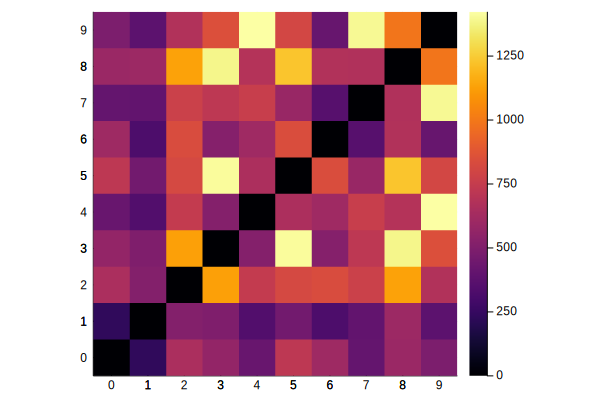

In [9]:
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], svmatcpp, aspect_ratio=1)

In [18]:
svmatcpp_normalised = svmatcpp ./ findmax(svmatcpp[:])[1] .* 3

10×10 Array{Float64,2}:
 0.0       0.478566  1.37667  1.18904  …  0.85383   1.24385  1.02881 
 0.478566  0.0       1.07941  1.04568     0.839072  1.2565   0.792691
 1.37667   1.07941   0.0      2.37386     1.62544   2.3844   1.42516 
 1.18904   1.04568   2.37386  0.0         1.51792   2.9241   1.78777 
 0.883345  0.710471  1.5643   1.08573     1.60014   1.45046  3.0     
 1.51792   0.950808  1.72031  2.9747   …  1.22909   2.59733  1.69712 
 1.27758   0.678848  1.76247  1.08784     0.750527  1.42305  0.87702 
 0.85383   0.839072  1.62544  1.51792     0.0       1.41883  2.95151 
 1.24385   1.2565    2.3844   2.9241      1.41883   0.0      2.08714 
 1.02881   0.792691  1.42516  1.78777     2.95151   2.08714  0.0     

In [19]:
exp.(svmatcpp_normalised) ./ sum(exp.(svmatcpp_normalised))

10×10 Array{Float64,2}:
 0.00192125  0.00310043  0.00761138  …  0.00451229  0.00666471  0.00537516
 0.00310043  0.00192125  0.00565413     0.00444619  0.00674955  0.00424468
 0.00761138  0.00565413  0.00192125     0.0097612   0.0208504   0.00798955
 0.00630923  0.00546658  0.0206318      0.00876613  0.0357689   0.0114816 
 0.00464746  0.00390965  0.00918229     0.00951735  0.00819425  0.0385893 
 0.00876613  0.00497181  0.0107326   …  0.00656708  0.0257982   0.0104866 
 0.00689336  0.00378794  0.0111948      0.00406943  0.00797272  0.00461816
 0.00451229  0.00444619  0.0097612      0.00192125  0.00793917  0.0367628 
 0.00666471  0.00674955  0.0208504      0.00793917  0.00192125  0.0154888 
 0.00537516  0.00424468  0.00798955     0.0367628   0.0154888   0.00192125

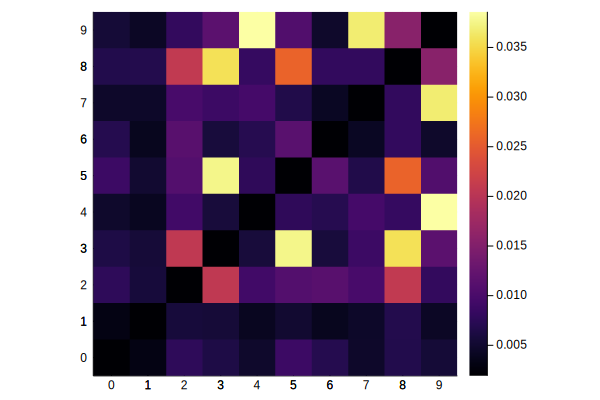

In [20]:
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], exp.(svmatcpp_normalised) ./ sum(exp.(svmatcpp_normalised)), aspect_ratio=1)

In [23]:
savefig("classsvcpp.png")

## CPU

In [7]:
counter = 0
svm_time_list = Float64[]
open("data/cpu.txt") do file
    for l in eachline(file)
        if occursin("finished", l)
            svm_time = split(l," ")[end]
            append!(svm_time_list, parse(Float64, svm_time))
            print(svm_time, " ")
            global counter += 1
        end
    end
end
counter

3.5443029403686523 10.69624400138855 9.853065013885498 5.7761828899383545 15.102074146270752 20.52434992790222 5.475625038146973 7.910117864608765 6.460092067718506 11.411255121231079 9.6613130569458 5.153836965560913 10.116142988204956 13.153158187866211 9.529279947280884 16.11209011077881 6.770704030990601 34.78479504585266 18.132017850875854 23.676019191741943 21.769629955291748 15.479489088058472 36.93316888809204 14.803895950317383 10.637844800949097 48.00245189666748 9.680148124694824 19.094316005706787 49.80654501914978 21.440425872802734 13.154385089874268 13.554675817489624 21.666675090789795 14.922518014907837 77.6521360874176 20.482019186019897 12.777540922164917 44.57977890968323 16.67224383354187 5.001564979553223 12.68641996383667 6.653795003890991 13.216398000717163 66.79498291015625 30.717548847198486 5.0602710247039795 10.764405012130737 10.296857118606567 5.887248992919922 14.382540941238403 9.078860998153687 6.0659401416778564 7.952544927597046 6.587939977645874 11.1

90

In [9]:
svm_time_list = (svm_time_list[1:45] + svm_time_list[46:90])/2

45-element Array{Float64,1}:
  4.302286982536316 
 10.730324506759644 
 10.074961066246033 
  5.831715941429138 
 14.742307543754578 
 14.801605463027954 
  5.7707825899124146
  7.931331396102905 
  6.52401602268219  
 11.27062213420868  
  9.89112651348114  
  5.072440505027771 
 10.250995993614197 
  ⋮                 
 14.757322072982788 
 72.94599401950836  
 26.48468053340912  
 12.896091938018799 
 47.07117700576782  
 19.110641956329346 
  5.205690026283264 
 13.58163845539093  
  6.886870503425598 
 12.570476055145264 
 62.32234847545624  
 29.166935443878174 

In [10]:
heatmat = zeros(10,10)
heatmat_ctr = 0
for i=0:9, j=0:9
    j <= i && continue
    heatmat_ctr += 1
    print(i,j, " ")
    heatmat[i+1,j+1] = svm_time_list[heatmat_ctr]
    heatmat[j+1,i+1] = svm_time_list[heatmat_ctr]
end
heatmatjulia = heatmat

01 02 03 04 05 06 07 08 09 12 13 14 15 16 17 18 19 23 24 25 26 27 28 29 34 35 36 37 38 39 45 46 47 48 49 56 57 58 59 67 68 69 78 79 89 

10×10 Array{Float64,2}:
  0.0       4.30229  10.7303  10.075    …   5.77078   7.93133   6.52402
  4.30229   0.0      11.2706   9.89113     11.7573   17.6592    6.45547
 10.7303   11.2706    0.0     33.3731      14.951    37.7569   16.0167 
 10.075     9.89113  33.3731   0.0         18.1601   49.0506   20.9523 
  5.83172   5.07244  17.8055  10.7933      21.8618   14.7573   72.946  
 14.7423   10.251    28.6076  52.5432   …  12.8961   47.0712   19.1106 
 14.8016   17.7399   22.5569   9.70247      5.20569  13.5816    6.88687
  5.77078  11.7573   14.951   18.1601       0.0      12.5705   62.3223 
  7.93133  17.6592   37.7569  49.0506      12.5705    0.0      29.1669 
  6.52402   6.45547  16.0167  20.9523      62.3223   29.1669    0.0    

In [14]:
heatmatcpu = heatmat

10×10 Array{Float64,2}:
  0.0       4.30229  10.7303  10.075    …   5.77078   7.93133   6.52402
  4.30229   0.0      11.2706   9.89113     11.7573   17.6592    6.45547
 10.7303   11.2706    0.0     33.3731      14.951    37.7569   16.0167 
 10.075     9.89113  33.3731   0.0         18.1601   49.0506   20.9523 
  5.83172   5.07244  17.8055  10.7933      21.8618   14.7573   72.946  
 14.7423   10.251    28.6076  52.5432   …  12.8961   47.0712   19.1106 
 14.8016   17.7399   22.5569   9.70247      5.20569  13.5816    6.88687
  5.77078  11.7573   14.951   18.1601       0.0      12.5705   62.3223 
  7.93133  17.6592   37.7569  49.0506      12.5705    0.0      29.1669 
  6.52402   6.45547  16.0167  20.9523      62.3223   29.1669    0.0    

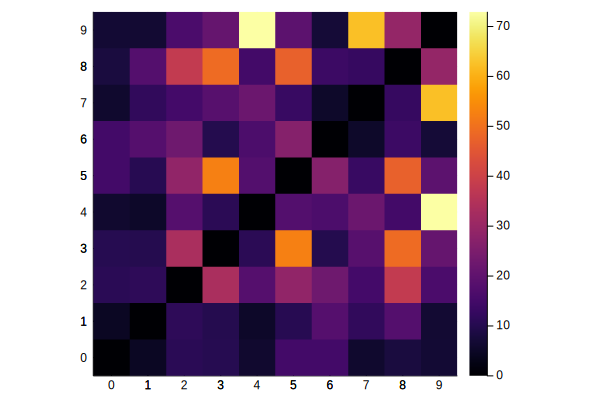

In [15]:
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], heatmatcpu, aspect_ratio=1)

In [13]:
# savefig("classtimecpu.png")

In [20]:
heatmapcpuvsgpu = hcat(heatmatjulia, heatmatcpu)

10×20 Array{Float64,2}:
  0.0       3.65181  13.4519  11.0033  …   5.77078   7.93133   6.52402
  3.65181   0.0      14.3599  21.4486     11.7573   17.6592    6.45547
 13.4519   14.3599    0.0     45.7146     14.951    37.7569   16.0167 
 11.0033   21.4486   45.7146   0.0        18.1601   49.0506   20.9523 
  6.21446   6.65778  20.3808  13.0694     21.8618   14.7573   72.946  
 14.6072   10.8139   26.8802  67.3901  …  12.8961   47.0712   19.1106 
 11.042     6.81008  30.9223  11.7501      5.20569  13.5816    6.88687
  7.10857   9.14221  19.0821  25.0923      0.0      12.5705   62.3223 
 11.1473   25.6914   45.704   62.8358     12.5705    0.0      29.1669 
  7.81423   8.41105  19.9142  26.8999     62.3223   29.1669    0.0    

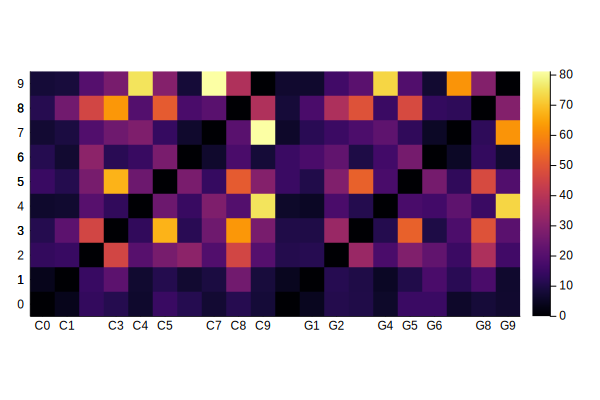

In [22]:
heatmap(vcat([string("C", i) for i = 0:9],[string("G", i) for i = 0:9]), [string(i) for i = 0:9], heatmapcpuvsgpu, aspect_ratio=1)

In [24]:
# savefig("classtimegpuvscpu.png")

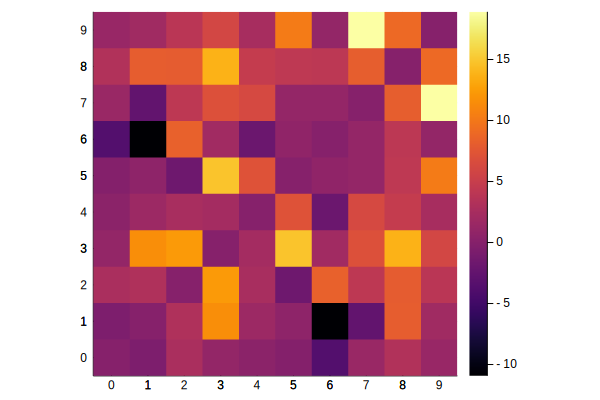

In [25]:
heatmap([string(i) for i = 0:9], [string(i) for i = 0:9], heatmatjulia-heatmatcpu, aspect_ratio=1)

In [27]:
savefig("classtimegpudiffcpu.png")